['0', '1', '2', '3']


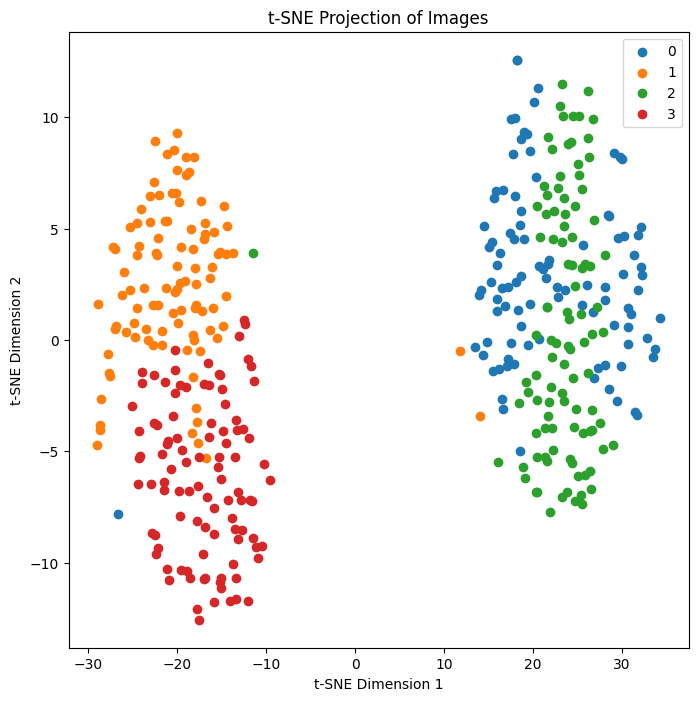

In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Set the path to the root folder containing the image folders
root_folder = '/home/paritosh/workspace/IGTD_data/Results/Test_1'

# Get the list of folders (classes) in the root folder
classes = os.listdir(root_folder)
print(classes)

# Initialize lists to store images and labels
images = []
labels = []

# Set the target image size and sample size
target_size = (200, 200)  # Adjust the size as needed
sample_size = 100  # Adjust the sample size as needed

# Iterate over each class folder
for class_folder in classes:
    class_path = os.path.join(root_folder, class_folder)
    
    # Get the list of image files in the class folder
    image_files = os.listdir(class_path)
    
    # Sample images from the class folder
    sampled_images = random.sample(image_files, min(sample_size, len(image_files)))
    
    # Iterate over the sampled image files
    for image_file in sampled_images:
        image_path = os.path.join(class_path, image_file)
        
        # Load the image, resize it, convert to grayscale, and convert it to a numpy array
        image = Image.open(image_path)
        image = image.resize(target_size)
        image = image.convert('L')  # Convert the image to grayscale
        image_array = np.array(image)
        
        # Flatten the image array and append it to the images list
        images.append(image_array.flatten())
        
        # Append the corresponding class label to the labels list
        labels.append(class_folder)

# Convert the images and labels lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Perform t-SNE projection
tsne = TSNE(n_components=2, random_state=42)
projected_images = tsne.fit_transform(images)

# Plot the projected images
plt.figure(figsize=(8, 8))
unique_labels = np.unique(labels)

for label in unique_labels:
    indices = np.where(labels == label)
    plt.scatter(projected_images[indices, 0], projected_images[indices, 1], label=label)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.title('t-SNE Projection of Images')
plt.show()